# Problem 1

Solving problem 1 using R in jupyter lab. Documentation is written in a separate pdf file.

-------------------


### a)

Extract data from https://www.uio.no/studier/emner/matnat/math/STK4900/data/no2.txt 

In [2]:
data = read.table("https://www.uio.no/studier/emner/matnat/math/STK4900/data/no2.txt", header=T)

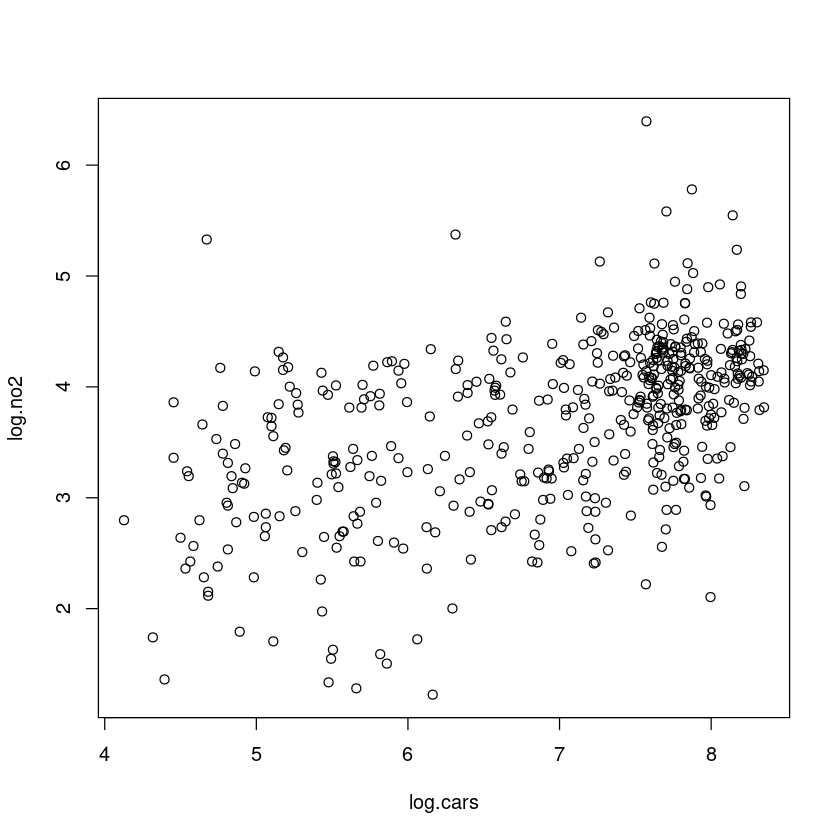

In [13]:
plot(log.no2~log.cars, data=data)